In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
import logging


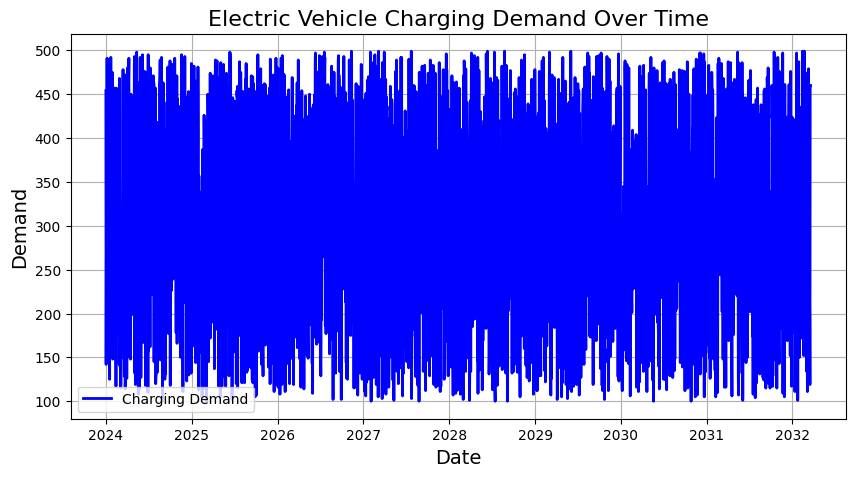

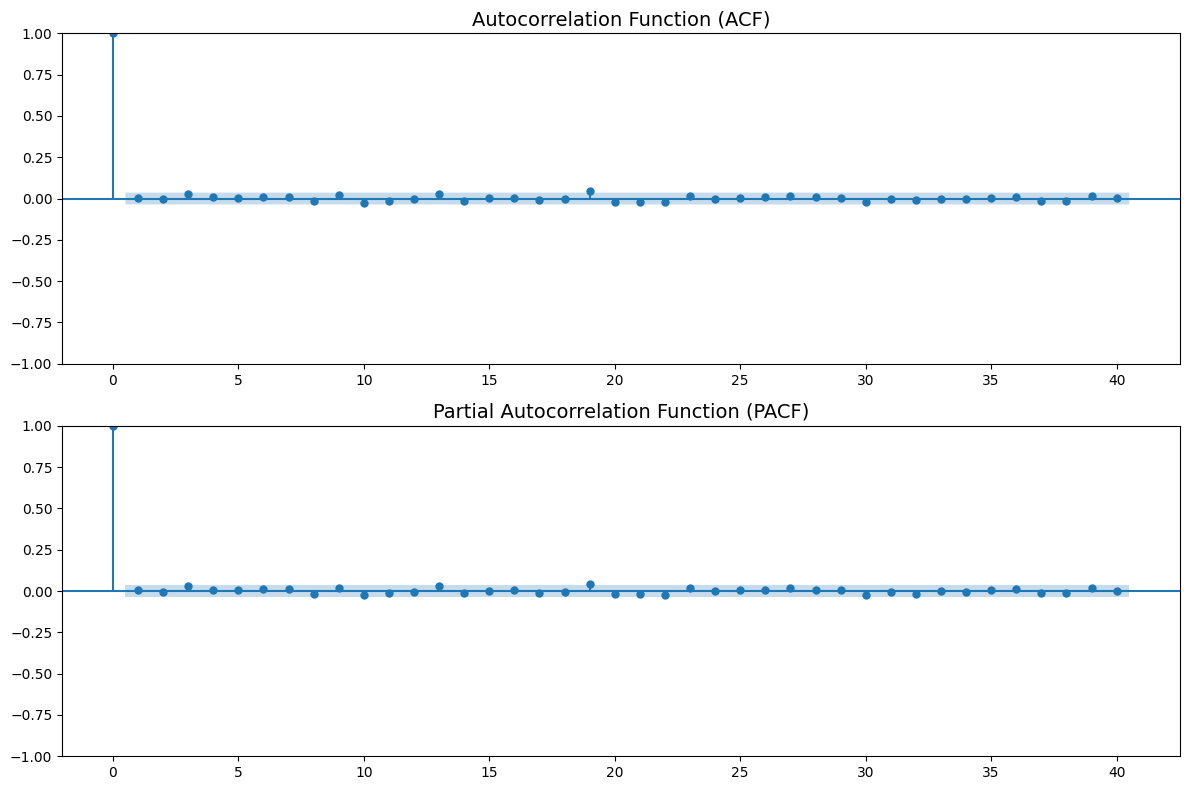

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


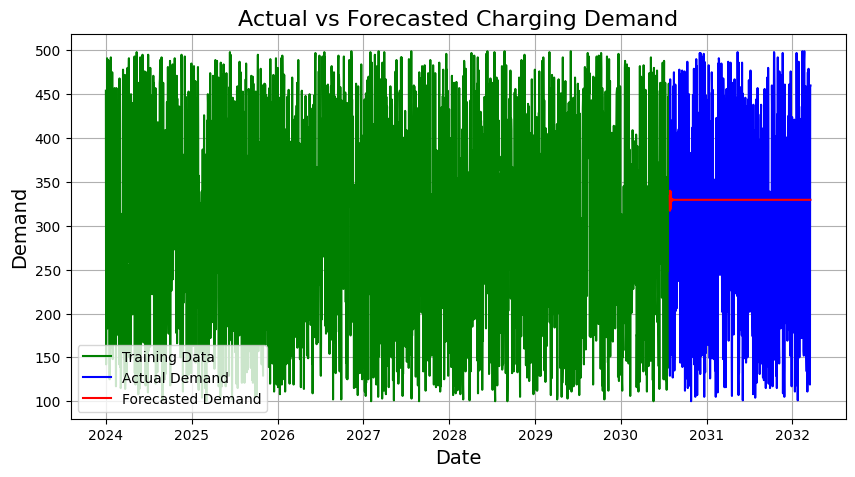

In [27]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
import logging

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def load_data(file_path):
    """
    Loads the dataset from a CSV file and returns a pandas DataFrame.
    :param file_path: str - The path to the CSV file.
    :return: pd.DataFrame
    """
    try:
        df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
        logging.info(f"Data loaded successfully from {file_path}")
        return df
    except FileNotFoundError:
        logging.error(f"File not found: {file_path}")
        raise
    except Exception as e:
        logging.error(f"An error occurred while loading the data: {e}")
        raise

def visualize_data(df):
    """
    Visualizes the demand data over time.
    :param df: pd.DataFrame - The dataset with 'Demand' column.
    """
    plt.figure(figsize=(10, 5))
    plt.plot(df['Demand'], label='Charging Demand', color='blue', linewidth=2)
    plt.title('Electric Vehicle Charging Demand Over Time', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Demand', fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()

def plot_acf_pacf(df):
    """
    Plots the ACF and PACF graphs for the given data.
    :param df: pd.DataFrame - The dataset with 'Demand' column.
    """
    fig, ax = plt.subplots(2, 1, figsize=(12, 8))
    plot_acf(df['Demand'], ax=ax[0], lags=40)
    ax[0].set_title('Autocorrelation Function (ACF)', fontsize=14)
    plot_pacf(df['Demand'], ax=ax[1], lags=40)
    ax[1].set_title('Partial Autocorrelation Function (PACF)', fontsize=14)
    plt.tight_layout()
    plt.show()

def train_test_split(df, train_size=0.8):
    """
    Splits the dataset into training and testing sets.
    :param df: pd.DataFrame - The dataset.
    :param train_size: float - The proportion of the dataset to include in the train split.
    :return: tuple - Training and testing data.
    """
    train_length = int(len(df) * train_size)
    train, test = df.iloc[:train_length], df.iloc[train_length:]
    logging.info(f"Training data size: {len(train)}; Testing data size: {len(test)}")
    return train, test

def fit_arima_model(train_data):
    """
    Fits an ARIMA model to the training data.
    :param train_data: pd.Series - The demand data for training.
    :return: ARIMA model fit object
    """
    model = ARIMA(train_data, order=(5, 1, 0))
    model_fit = model.fit()
    logging.info("ARIMA model trained successfully.")
    return model_fit

def forecast_demand(model_fit, steps):
    """
    Forecasts future demand using the trained ARIMA model.
    :param model_fit: ARIMA model fit object
    :param steps: int - Number of steps (time points) to forecast.
    :return: pd.Series - Forecasted values.
    """
    forecast = model_fit.forecast(steps=steps)
    logging.info(f"Forecasted {steps} steps into the future.")
    return forecast

def plot_forecast(train, test, forecast):
    """
    Plots the forecasted demand versus the actual demand.
    :param train: pd.Series - The training data.
    :param test: pd.Series - The actual test data.
    :param forecast: pd.Series - The forecasted demand.
    """
    plt.figure(figsize=(10, 5))
    plt.plot(train.index, train, label='Training Data', color='green')
    plt.plot(test.index, test, label='Actual Demand', color='blue')
    plt.plot(test.index, forecast, label='Forecasted Demand', color='red')
    plt.title('Actual vs Forecasted Charging Demand', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Demand', fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()

def calculate_error(test, forecast):
    """
    Calculates and prints the Mean Squared Error (MSE) between the actual and forecasted demand.
    :param test: pd.Series - Actual test data.
    :param forecast: pd.Series - Forecasted values.
    """
    mse = mean_squared_error(test, forecast)
    logging.info(f'Mean Squared Error: {mse:.4f}')
    return mse

def main():
    # File path to the dataset
    file_path = 'ev_charging_data_large.csv'  # Update this path to your dataset

    # Step 1: Load and explore data
    df = load_data(file_path)

    # Step 2: Visualize the data
    visualize_data(df)

    # Step 3: Plot ACF and PACF
    plot_acf_pacf(df)

    # Step 4: Split data into train and test sets
    train, test = train_test_split(df)

    # Step 5: Fit ARIMA model
    model_fit = fit_arima_model(train['Demand'])

    # Print model summary
    logging.info(model_fit.summary())

    # Step 6: Make predictions
    forecast = forecast_demand(model_fit, steps=len(test))

    # Step 7: Plot the forecast vs actual demand
    plot_forecast(train['Demand'], test['Demand'], forecast)

    # Step 8: Calculate forecast error
    calculate_error(test['Demand'], forecast)

if __name__ == '__main__':
    main()
